<a href="https://colab.research.google.com/github/Reby0217/miniProject9/blob/main/colab_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def validate_dataframe(df: pd.DataFrame, required_columns: list):
    """
    Validates the given DataFrame for the following:
    - Checks if the DataFrame is empty.
    - Ensures required columns are present in the DataFrame.

    Args:
    - df (pd.DataFrame): The dataset as a DataFrame.
    - required_columns (list): List of required columns to check.

    Raises:
    - ValueError: If the DataFrame is empty.
    - KeyError: If any required column is missing.
    """
    if df.empty:
        raise ValueError("The DataFrame is empty.")

    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise KeyError(f"Missing columns: {', '.join(missing_columns)}")


In [4]:
def read_data(filepath: str) -> pd.DataFrame:
    """
    Reads the dataset from the given file path and returns a pandas DataFrame.

    Args:
    - filepath (str): The path to the CSV file.

    Returns:
    - pd.DataFrame: The dataset.
    """
    return pd.read_csv(filepath)

In [5]:
def get_descriptive_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the descriptive statistics of the given dataset.

    Args:
    - df (pd.DataFrame): The dataset as a DataFrame.

    Returns:
    - pd.DataFrame: Descriptive statistics of the dataset.

    Raises:
    - KeyError: If the 'Net Worth (in billions)' column is missing.
    - ValueError: If the DataFrame is empty.
    """
    validate_dataframe(df, ["Net Worth (in billions)"])
    return df.describe()

In [6]:
def get_industry_avg_net_worth(df: pd.DataFrame) -> pd.Series:
    """
    Groups the data by Industry and calculates the average net worth.

    Args:
    - df (pd.DataFrame): The dataset as a DataFrame.

    Returns:
    - pd.Series: A series with the average net worth for each industry.
    """
    validate_dataframe(df, ["Industry", "Net Worth (in billions)"])
    return df.groupby("Industry")["Net Worth (in billions)"].mean()

In [7]:
def calculate_skewness_kurtosis(df: pd.DataFrame) -> tuple:
    """
    Calculates the skewness and kurtosis of the net worth distribution.

    Args:
    - df (pd.DataFrame): The dataset as a DataFrame.

    Returns:
    - tuple: A tuple containing the skewness and kurtosis values.
    """
    validate_dataframe(df, ["Net Worth (in billions)"])
    skewness = df["Net Worth (in billions)"].skew()
    kurtosis = df["Net Worth (in billions)"].kurtosis()
    print("Skewness:", skewness, "Kurtosis:", kurtosis)
    return skewness, kurtosis


In [8]:
def plot_industry_avg_net_worth(industry_avg: pd.Series):
    """
    Plots the average net worth by industry using a bar plot.

    Args:
    - industry_avg (pd.Series): A series with the average net worth for each industry.
    """
    if industry_avg.empty:
        raise ValueError("No data to plot for average net worth.")

    # Generate a color palette with as many colors as there are industries
    colors = sns.color_palette("husl", len(industry_avg))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=industry_avg.index, y=industry_avg.values, palette=colors, hue=industry_avg.index)
    plt.xlabel("Industry")
    plt.title("Average Net Worth by Industry")
    plt.xticks(rotation=90)
    plt.ylabel("Net Worth (in billions)")
    plt.show()


In [9]:
def plot_net_worth_distribution_by_industry(df: pd.DataFrame):
    """
    Plots a boxplot showing the distribution of net worth by industry.

    Args:
    - df (pd.DataFrame): The dataset as a DataFrame.
    """
    validate_dataframe(df, ["Industry", "Net Worth (in billions)"])
    colors = sns.color_palette("husl", len(df["Industry"].unique()))

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Industry", y="Net Worth (in billions)", data=df, palette=colors, hue= df["Industry"])
    plt.title("Net Worth Distribution by Industry")
    plt.xticks(rotation=90)
    plt.ylabel("Net Worth (in billions)")
    plt.show()


### Load dataset

In [10]:
dataset_path = "/content/drive/MyDrive/Top_1000_wealthiest_people.csv"
df = read_data(dataset_path)

### Display the first few rows

In [11]:
df.head()

,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart


### Perform descriptive statistics

In [12]:
# Perform descriptive statistics
get_descriptive_statistics(df)

,Net Worth (in billions)
count,1000.000000
mean,102.616270
std,56.796062
min,1.570000
25%,54.960000
50%,103.365000
75%,151.912500
max,199.240000


### Group by Industry and calculate mean net worth

In [13]:
industry_avg = get_industry_avg_net_worth(df)
print(industry_avg)

Industry
Automotive             97.629535
Cosmetics              92.318431
Fashion                88.407273
Finance               102.168400
Manufacturing         105.731170
Media                 100.579825
Petrochemicals        100.837442
Retail                107.618848
Technology            101.640000
Telecommunications    113.265490
Name: Net Worth (in billions), dtype: float64


### Skewness and kurtosis of Net Worth distribution

In [14]:
net_worth_skewness, net_worth_kurtosis = calculate_skewness_kurtosis(df)
print(f"\nSkewness of Net Worth Distribution: {net_worth_skewness}")
print(f"Kurtosis of Net Worth Distribution: {net_worth_kurtosis}")

Skewness: -0.008365801815813293 Kurtosis: -1.1691633223750484

Skewness of Net Worth Distribution: -0.008365801815813293
Kurtosis of Net Worth Distribution: -1.1691633223750484


The dataset consists of 1,000 individuals, with the average net worth being approximately $102.6 billion. The net worth values range from $1.57 billion to $199.24 billion, with a relatively normal distribution (Skewness: -0.008). The negative kurtosis (-1.17) indicates that the distribution is flatter than a normal distribution, with fewer extreme values.

### Mean Net Worth (in Billions) Across Different Industries

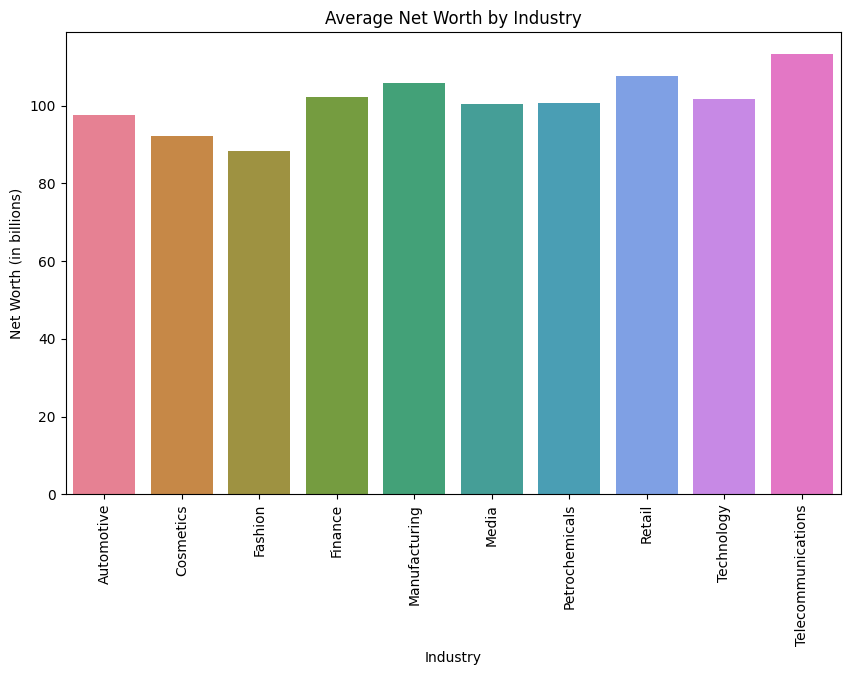

In [15]:
plot_industry_avg_net_worth(industry_avg)

### Net Worth Distribution by Industry (Box Plot: Median, Quartiles, and Outliers)

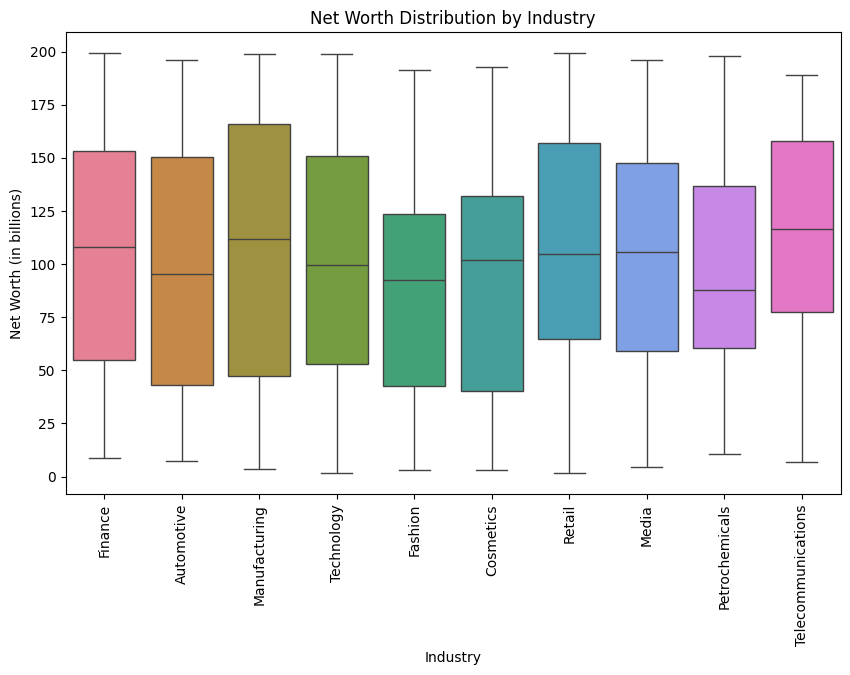

In [16]:
plot_net_worth_distribution_by_industry(df)

Overall, Telecommunications and Retail industries dominate in terms of average net worth, while the Fashion and Cosmetics industries fall on the lower end of the spectrum. The skewness and kurtosis metrics suggest that the net worth distribution is relatively symmetrical and lacks extreme outliers.